In [50]:
# first we import all our required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
bc = df = pd.read_csv("C:\\Users\\muski\\Desktop\\NewProject\\BreastCancer.csv")

In [52]:
bc.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [53]:
bc.dropna(inplace = True)

We check out the statistical measurements of our data at a glance.

In [54]:
bc.shape

(317, 16)

In [55]:
bc.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


We can also see the attributes of our dataset:

In [56]:
print('The attributes of the dataset are:\n')
for txt in bc.columns:
    print('--', txt)

The attributes of the dataset are:

-- Patient_ID
-- Age
-- Gender
-- Protein1
-- Protein2
-- Protein3
-- Protein4
-- Tumour_Stage
-- Histology
-- ER status
-- PR status
-- HER2 status
-- Surgery_type
-- Date_of_Surgery
-- Date_of_Last_Visit
-- Patient_Status


## Gender distribution in dataset

The first thing we do is to see how many male vs female patients we have:

In [57]:
gen = (
    bc
    .groupby('Gender', as_index = False)
    .agg(Total = ('Age', 'count'))
)

In [58]:
gen['Percentage'] = (gen['Total']/gen['Total'].sum()) * 100

In [59]:
gen

,Gender,Total,Percentage
0,FEMALE,313,98.73817
1,MALE,4,1.26183


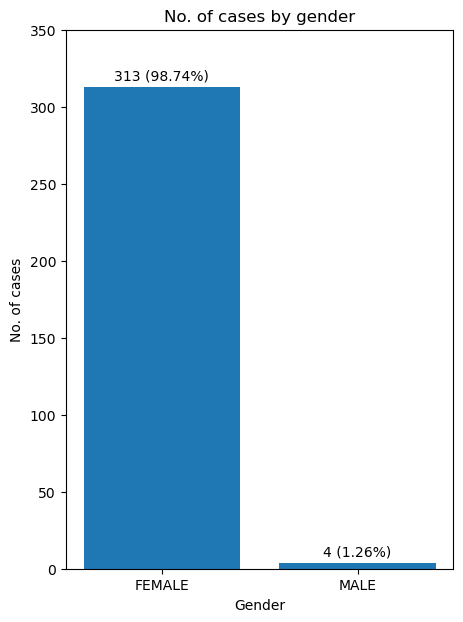

In [60]:
plt.figure(figsize = (5,7))
gen_bar = plt.bar(gen['Gender'], gen['Total'])
plt.yticks(np.arange(0,400,50))
plt.bar_label(gen_bar, labels = ['{} ({:.2f}%)'.format(t,p) for t,p in zip(gen['Total'],gen['Percentage'])], padding = 3)
plt.xlabel('Gender')
plt.ylabel('No. of cases')
plt.title('No. of cases by gender')
plt.show()

We see from above that there are only **four male cancer patients** or **1.26%** of the total, as opposed to **313 female cancer patients** or **98.74%** of the total, in the dataset. This could make any analysis of males vs females problematic, as we would need a sample size of >4 in order to generate any significant results.

## Age distribution in dataset

We can also look at the age ranges in our dataset to get a feel for its distribution. For this, we can construct a histogram:

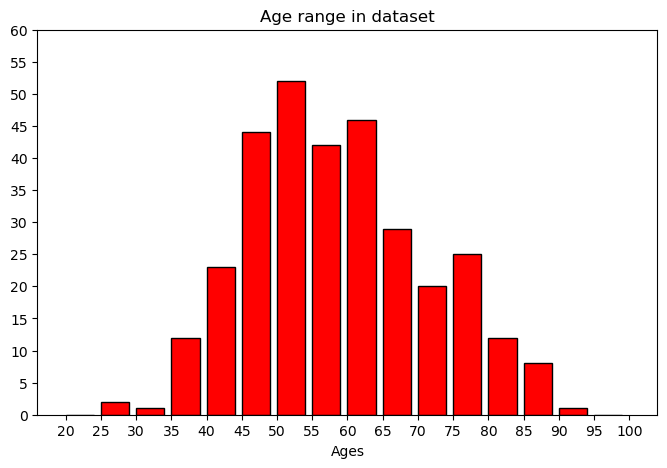

In [61]:
bins = list(range(20,105,5))

plt.figure(figsize = (8,5))
plt.hist(bc['Age'].astype(int), width = 4, align = 'mid', bins = bins, color = 'red', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Age range in dataset')
plt.yticks(np.arange(0,65,5))
plt.show()

## Number of cases by cancer type

The first thing we need to do beyond looking at the initial statistics of the dataset, is to calculate the number of cases by cancer type. In the dataset, the cancer type is given under the column 'Histology'.

In [62]:
cancer_types_total = bc.groupby('Histology', as_index = False)['Age'].count()

In [63]:
cancer_types_total.rename(columns = {'Age': 'Total_Number'}, inplace = True)

In [64]:
# for scaling, we get the percentage of total cases for each type of case
totals_of_dataset = []
for hist, num in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    answer = (num/bc.shape[0]) * 100
    totals_of_dataset.append(answer)

In [65]:
cancer_types_total['Percentage'] = totals_of_dataset

In [66]:
cancer_types_total

,Histology,Total_Number,Percentage
0,Infiltrating Ductal Carcinoma,224,70.662461
1,Infiltrating Lobular Carcinoma,81,25.552050
2,Mucinous Carcinoma,12,3.785489


From the table above, we see that there are **224 cases of Infiltrating Ductal Carcinoma**, **81 cases of Infiltrating Lobular Carcinoma** and only **12 cases of mucinous carcinoma**.

To get a better idea of the true proportion of each number to cases to the total number of cases, we plot a bar chart with the percentage of cases:

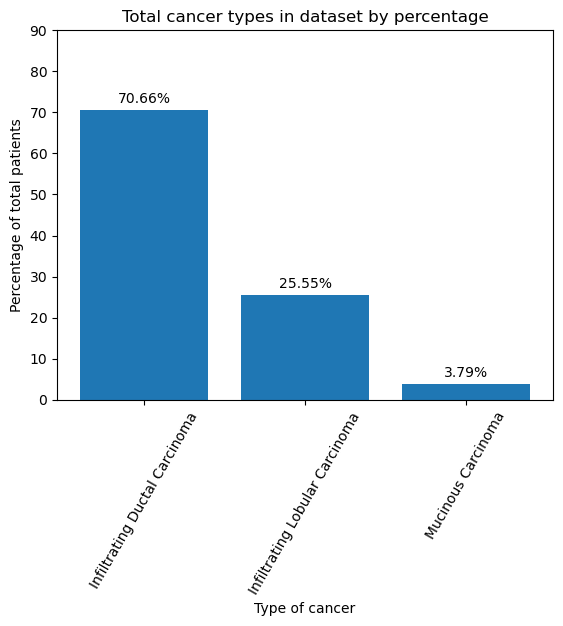

In [67]:
totals_bar = plt.bar(cancer_types_total['Histology'],cancer_types_total['Percentage'])
plt.xticks(rotation = 60)
plt.yticks(np.arange(0,100,10))
plt.xlabel('Type of cancer')
plt.ylabel('Percentage of total patients')
plt.title('Total cancer types in dataset by percentage')
plt.bar_label(totals_bar, labels = ['{:.2f}%'.format(t) for t in totals_bar.datavalues], padding = 3)
plt.show()

So now we see that in our dataset, **70.66%** of cases are of the **Infiltrating Ductal Carcinoma** type, **25.55%** are of the **Infiltrating Lobular Carcinoma** type, and only **3.79%** are of the **Mucinous Carcinoma** type. This fits with the fact that Infiltrating Ductal Carcinoma is the most common type of breast cancer; in any given sample dataset, it is likely that it is the most popular of all the types.

## Stages of each cancer type

We further subdivide each cancer type into its stages, to get a more elaborate picture of the distribution of our dataset:

In [68]:
# we group the cancer types by histology and stage, and count them
cancer_type_by_stage = (
    bc
    .groupby(['Histology', 'Tumour_Stage'], as_index = False)
    .agg(Total = ('Age', 'count'))
)

In [69]:
cancer_type_by_stage

,Histology,Tumour_Stage,Total
0,Infiltrating Ductal Carcinoma,I,47
1,Infiltrating Ductal Carcinoma,II,120
2,Infiltrating Ductal Carcinoma,III,57
3,Infiltrating Lobular Carcinoma,I,10
4,Infiltrating Lobular Carcinoma,II,51
5,Infiltrating Lobular Carcinoma,III,20
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9


Now we can see that for **Infiltrating Ductal Carcinoma** and **Infiltrating Lobular Carcinoma**, the number of Stage II patients are the greatest, followed by stage III. This could be due to the fact that many patients do not present to the doctor until they are in Stage II of the disease.

## Age ranges for each cancer type

We can also look at the age ranges for each cancer type, to see whether any particular type favours any age range. For this we need to transform the dataset to get the number of cases in each age range.

In [70]:
# first we get subsets of the original dataframe by age range, and put each subset in a dictionary
cancer_ages_raw = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = bc.loc[(bc['Age'] >= bins[i]) & (bc['Age'] < bins[i + 1])][['Histology', 'Age']]
        if row.empty is False:
            cancer_ages_raw.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

In [71]:
# then we group by histology (to get each cancer type) and put these in another list of dictionaries

cancer_ages_list = []

for key, val in cancer_ages_raw.items():
    age_range = key
    hist = val.groupby('Histology', as_index = False).count()['Histology']
    age_count = val.groupby('Histology', as_index = False).count()['Age']
    hist_vals = {}
    
    for h, a in zip(hist, age_count):
        hist_vals.update({'Age_range': age_range, h:a})
        
    cancer_ages_list.append(hist_vals)

In [72]:
# finally, we convert this list to a dataframe

cancer_ages = pd.DataFrame(cancer_ages_list)

In [73]:
# performing clean-up in the next few cells...

cancer_ages.fillna(0, inplace = True)

In [74]:
cols = ['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma']

In [75]:
for vla in cols:
    cancer_ages[vla] = cancer_ages[vla].astype(int)

In [76]:
cancer_ages.head()

,Age_range,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
0,25 to 30,1,1,0
1,30 to 35,1,0,0
2,35 to 40,7,4,1
3,40 to 45,12,10,1
4,45 to 50,30,12,2


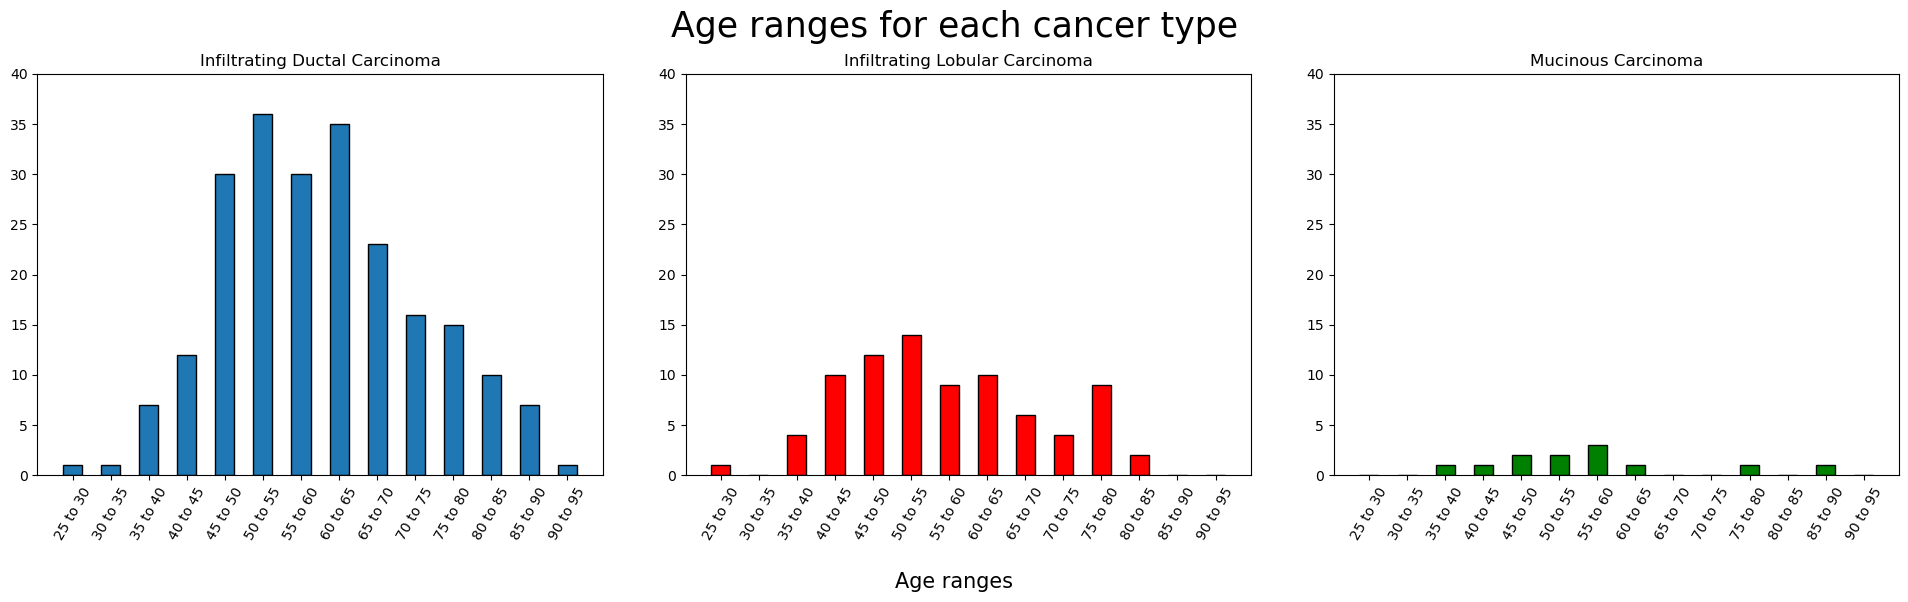

In [77]:
fig, axs = plt.subplots(1,3, figsize = (20,6))
axs[0].bar(cancer_ages['Age_range'], cancer_ages['Infiltrating Ductal Carcinoma'], width = 0.5, edgecolor = 'black')
axs[0].set_xticks(list(cancer_ages['Age_range']))
axs[0].set_xticklabels(list(cancer_ages['Age_range']), rotation = 60)
axs[0].set_yticks(range(0,45, 5))
axs[0].set_title('Infiltrating Ductal Carcinoma')

axs[1].bar(cancer_ages['Age_range'], cancer_ages['Infiltrating Lobular Carcinoma'], width = 0.5, edgecolor = 'black', color = 'red')
axs[1].set_xticks(list(cancer_ages['Age_range']))
axs[1].set_xticklabels(list(cancer_ages['Age_range']), rotation = 60)
axs[1].set_yticks(range(0,45, 5))
axs[1].set_title('Infiltrating Lobular Carcinoma')

axs[2].bar(cancer_ages['Age_range'], cancer_ages['Mucinous Carcinoma'], width = 0.5, edgecolor = 'black', color = 'green')
axs[2].set_xticks(list(cancer_ages['Age_range']))
axs[2].set_xticklabels(list(cancer_ages['Age_range']), rotation = 60)
axs[2].set_yticks(range(0,45, 5))
axs[2].set_title('Mucinous Carcinoma')

fig.tight_layout(pad = 4)
fig.supxlabel('Age ranges', fontsize = 15)
fig.suptitle('Age ranges for each cancer type', fontsize = 25)
plt.show()

We see from above that the rates of occurance of cancer of all types is greatest in middle ages, with rates of occurance declining at both extremes of age. 

Patients 45+ are **nearly double** the number of patients <45 having **Infiltrating Ductal Carcinoma**, with rates jumping from around **13% to 30%** for ages **45-65**, before gradually declining beyond.

For **Infiltrating Lobular Carcinoma** the number of patients rises morely evenly, with only **1%** of patients from age **25** to **15%** in ages **50-55**. At the other tail of the curve, there is a decrease of 5-10% in numbers up to ages 75-80.

In **Mucinous Carcinoma**, it is very difficult to interpret any trends due to the smaller number of samples.

## Mortality

Mortality is a health statistic that corresponds to the total number of deaths per unit time in a population divided by the population's number. Since our dataset gives us the patient's status (alive or dead), it would be interesting to calculate the mortality by different parameters for our dataset.

### Number of deaths each age range 

First we can take a look at the number of deaths in each age range. For this, weonce again need to transform the data before we can work with it.

In [78]:
# We get the patient statuses and ages by age ranges, and put the subsets of data into a dictionary

cancer_mort_raw = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = bc.loc[(bc['Age'] >= bins[i]) & (bc['Age'] < bins[i + 1])][['Patient_Status', 'Age']]
        if row.empty is False:
            cancer_mort_raw.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

In [79]:
# we further clean the data, and rejoin the subsets into one dataframe

cancer_mort_list = []

for key, val in cancer_mort_raw.items():
    age_range = key
    status_df = val.groupby('Patient_Status', as_index = False).count()
    status_vals = {}
    
    for ps, a in zip(status_df['Patient_Status'], status_df['Age']):
        status_vals.update({'Age_range': age_range, ps: a})
        
    cancer_mort_list.append(status_vals)

In [80]:
cancer_mort = pd.DataFrame(cancer_mort_list)
cancer_mort.fillna(0, inplace = True)

In [81]:
cancer_mort.head()

,Age_range,Alive,Dead
0,25 to 30,1.0,1.0
1,30 to 35,0.0,1.0
2,35 to 40,11.0,1.0
3,40 to 45,20.0,3.0
4,45 to 50,33.0,11.0


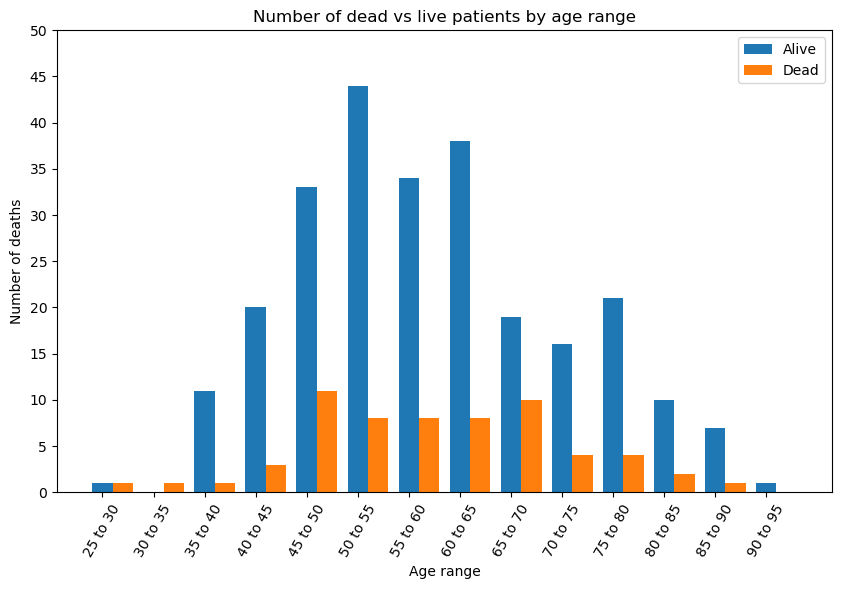

In [82]:
fig = plt.figure(figsize = (10,6))

age_range = list(cancer_mort['Age_range'])
x = np.arange(len(age_range))
width = 0.4

plt.bar(x, cancer_mort['Alive'], width = width, label = 'Alive')
plt.bar(x + width, cancer_mort['Dead'], width = width, label = 'Dead')
plt.xticks(x, rotation = 60, labels = age_range)
plt.yticks(np.arange(0, 55, 5))
plt.title('Number of dead vs live patients by age range')
plt.xlabel('Age range')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

From the above chart, we can see that deaths in all age ranges follow a normal distribution, same as the overall distribution of number of cases. We could try to get the percentages for each age range, but considering that we have an uneven number of patients in each range, our results could be deciphered incorrectly. 

### Mortality rate by cancer type

We can see what the mortality is for each cancer type:

In [83]:
cancer_types = (
    bc
    .groupby(['Histology', 'Patient_Status'], as_index = False)
    .agg(Total = ('Age', 'count'))
)

In [84]:
cancer_types

,Histology,Patient_Status,Total
0,Infiltrating Ductal Carcinoma,Alive,179
1,Infiltrating Ductal Carcinoma,Dead,45
2,Infiltrating Lobular Carcinoma,Alive,67
3,Infiltrating Lobular Carcinoma,Dead,14
4,Mucinous Carcinoma,Alive,9
5,Mucinous Carcinoma,Dead,3


In [85]:
total_lesions = cancer_types_total['Total_Number'].sum()

ratios_by_type = []
ratios_by_total = []
for hist, pat_total in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    results = cancer_types.loc[cancer_types['Histology'] == hist]
    
    for result in results['Total']:
        ratio_by_type = (result/pat_total)*100
        ratios_by_type.append(ratio_by_type)
        
        ratio_by_total = (result/total_lesions)*100
        ratios_by_total.append(ratio_by_total)

In [86]:
cancer_types['Ratio by cancer type (%)'] = ratios_by_type
cancer_types['Ratio by total (%)'] = ratios_by_total

In [87]:
cancer_types

,Histology,Patient_Status,Total,Ratio by cancer type (%),Ratio by total (%)
0,Infiltrating Ductal Carcinoma,Alive,179,79.910714,56.466877
1,Infiltrating Ductal Carcinoma,Dead,45,20.089286,14.195584
2,Infiltrating Lobular Carcinoma,Alive,67,82.716049,21.135647
3,Infiltrating Lobular Carcinoma,Dead,14,17.283951,4.416404
4,Mucinous Carcinoma,Alive,9,75.000000,2.839117
5,Mucinous Carcinoma,Dead,3,25.000000,0.946372


Above, we can see the no. of cases of each cancer type, the patient status, and the ratio of status by cancer type as well as total number of cases. 

In [88]:
cancer_types_alive = cancer_types.loc[cancer_types['Patient_Status'] == 'Alive'].copy()
cancer_types_dead = cancer_types.loc[cancer_types['Patient_Status'] == 'Dead'].copy()

In [89]:
cancer_types_alive.reset_index(inplace = True)
cancer_types_alive.drop('index', axis = 1, inplace = True)

cancer_types_dead.reset_index(inplace = True)
cancer_types_dead.drop('index', axis = 1, inplace = True)

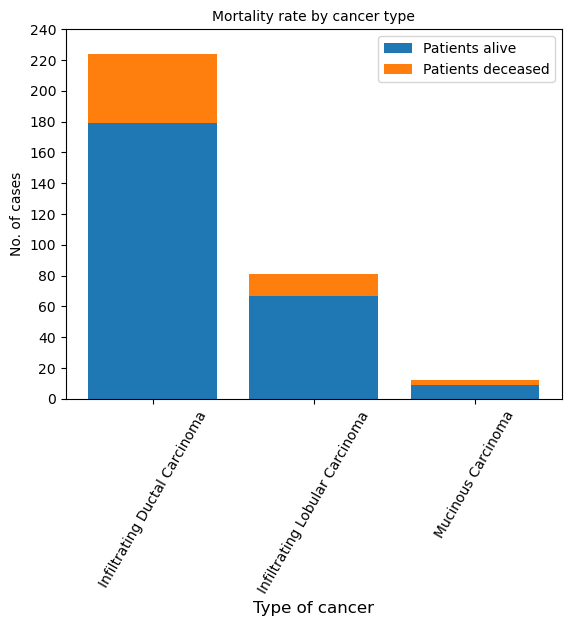

In [91]:
plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Total'], label = 'Patients alive')
plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Total'], bottom = cancer_types_alive['Total'], label = 'Patients deceased')

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 250, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 10})
plt.xlabel('Type of cancer', fontdict={'fontsize': 12})
plt.title('Mortality rate by cancer type', fontdict={'fontsize': 10})
plt.legend()

plt.show()